# Final Analysis: LLM Reasoning with Hints - Comprehensive Research Results

This notebook presents a comprehensive analysis of OpenAI GPT-4o-mini and Google Gemini 2.0 Flash performance on mathematical and scientific reasoning tasks under various hint conditions.

## Research Conditions:
1. **Baseline**: No hints provided
2. **Hints After**: Correct/Incorrect hints shown after questions
3. **Hints Before**: Correct/Incorrect hints shown before questions

## Analysis Structure:
- Baseline comparison between models
- Individual model deep dives
- Head-to-head comparisons
- Statistical analysis
- Key insights and findings

## 1. Setup and Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Define color schemes
OPENAI_COLORS = ['#1E88E5', '#42A5F5', '#64B5F6', '#90CAF9']  # Blue palette
GEMINI_COLORS = ['#43A047', '#66BB6A', '#81C784', '#A5D6A7']  # Green palette
COMBINED_COLORS = ['#1E88E5', '#43A047', '#FFA726', '#EF5350']  # Blue, Green, Orange, Red

# Set default figure parameters
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

print('✅ Libraries imported successfully')
print(f'Notebook created: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

✅ Libraries imported successfully
Notebook created: 2026-01-03 18:44:25


## 2. Load All Evaluation Results

In [6]:
# Define results directory
results_dir = Path('results')

# Function to load with silent option
def load_latest_results_silent(pattern, silent=False):
    files = list(results_dir.glob(pattern))
    if not files:
        if not silent:
            print(f"⚠️  Not found: {pattern}")
        return None
    latest_file = max(files, key=lambda x: x.stat().st_mtime)
    df = pd.read_csv(latest_file)
    if not silent:
        print(f"✅ Loaded: {latest_file.name} ({len(df)} records)")
    return df

# Print header
print("=" * 70)
print("LOADING EVALUATION RESULTS")
print("=" * 70)

# Load all available results
print("\n📊 GEMINI MODEL RESULTS:")
print("-" * 50)

# Gemini - Baseline (with special handling for _baseline suffix)
gemini_baseline = None
for pattern in ['gemini_evaluation_results_*_baseline.csv', 'gemini_evaluation_results_*.csv', 'gemini_baseline_*.csv']:
    gemini_baseline = load_latest_results_silent(pattern, silent=True)
    if gemini_baseline is not None:
        print(f"✅ Baseline (NO hints): {len(gemini_baseline)} records")
        break
if gemini_baseline is None:
    print("⚠️  Baseline (NO hints): NOT FOUND")

# Gemini - Correct hints AFTER
gemini_hints_after = load_latest_results_silent('gemini_hints_evaluation_results_*.csv')
if gemini_hints_after is None:
    print("⚠️  Correct Hints AFTER: NOT FOUND")

# Gemini - Correct hints BEFORE
gemini_hints_before = load_latest_results_silent('gemini_hints_BEFORE_evaluation_*.csv')
if gemini_hints_before is None:
    print("⚠️  Correct Hints BEFORE: NOT FOUND")

# Gemini - Incorrect hints AFTER
gemini_ic_hints_after = load_latest_results_silent('gemini_ic_hints_evaluation_results_*.csv')
if gemini_ic_hints_after is None:
    print("⚠️  Incorrect Hints AFTER: NOT FOUND")

# Gemini - Incorrect hints BEFORE
gemini_ic_hints_before = load_latest_results_silent('gemini_ic_hints_BEFORE_evaluation_*.csv')
if gemini_ic_hints_before is None:
    print("⚠️  Incorrect Hints BEFORE: NOT FOUND")

print("\n📊 OPENAI MODEL RESULTS:")
print("-" * 50)

# OpenAI - Baseline
openai_baseline = load_latest_results_silent('openai_evaluation_results_*.csv')
if openai_baseline is None:
    print("⚠️  Baseline (NO hints): NOT FOUND")

# OpenAI - Correct hints AFTER
openai_hints_after = load_latest_results_silent('openai_hints_evaluation_results_*.csv')
if openai_hints_after is None:
    print("⚠️  Correct Hints AFTER: NOT FOUND")

# OpenAI - Correct hints BEFORE
openai_hints_before = load_latest_results_silent('openai_hints_BEFORE_evaluation_*.csv')
if openai_hints_before is None:
    print("⚠️  Correct Hints BEFORE: NOT FOUND")

# OpenAI - Incorrect hints AFTER
openai_ic_hints_after = load_latest_results_silent('openai_ic_hints_evaluation_results_*.csv')
if openai_ic_hints_after is None:
    print("⚠️  Incorrect Hints AFTER: NOT FOUND")

# OpenAI - Incorrect hints BEFORE (now available!)
openai_ic_hints_before = load_latest_results_silent('openai_ic_hints_BEFORE_evaluation_*.csv')
if openai_ic_hints_before is None:
    print("⚠️  Incorrect Hints BEFORE: NOT FOUND")

# Summary
print("\n" + "=" * 70)
print("DATA AVAILABILITY SUMMARY")
print("=" * 70)

total_datasets = 10
available_datasets = sum([
    gemini_baseline is not None,
    gemini_hints_after is not None,
    gemini_hints_before is not None,
    gemini_ic_hints_after is not None,
    gemini_ic_hints_before is not None,
    openai_baseline is not None,
    openai_hints_after is not None,
    openai_hints_before is not None,
    openai_ic_hints_after is not None,
    openai_ic_hints_before is not None
])

print(f"\n📈 Available: {available_datasets}/{total_datasets} datasets")

if available_datasets == 10:
    print("\n✅ ALL DATASETS AVAILABLE! Ready for complete analysis!")
else:
    # List missing datasets
    missing = []
    if gemini_baseline is None:
        missing.append("Gemini Baseline (no hints)")
    if gemini_hints_after is None:
        missing.append("Gemini Correct Hints AFTER")
    if gemini_hints_before is None:
        missing.append("Gemini Correct Hints BEFORE")
    if gemini_ic_hints_after is None:
        missing.append("Gemini Incorrect Hints AFTER")
    if gemini_ic_hints_before is None:
        missing.append("Gemini Incorrect Hints BEFORE")
    if openai_baseline is None:
        missing.append("OpenAI Baseline (no hints)")
    if openai_hints_after is None:
        missing.append("OpenAI Correct Hints AFTER")
    if openai_hints_before is None:
        missing.append("OpenAI Correct Hints BEFORE")
    if openai_ic_hints_after is None:
        missing.append("OpenAI Incorrect Hints AFTER")
    if openai_ic_hints_before is None:
        missing.append("OpenAI Incorrect Hints BEFORE")
    
    if missing:
        print("\n⚠️ Missing datasets:")
        for m in missing:
            print(f"   - {m}")

print("\n✅ Data loading complete!")

LOADING EVALUATION RESULTS

📊 GEMINI MODEL RESULTS:
--------------------------------------------------
✅ Baseline (NO hints): 120 records
✅ Loaded: gemini_hints_evaluation_results_20260103_053917.csv (120 records)
✅ Loaded: gemini_hints_BEFORE_evaluation_20260103_165551.csv (120 records)
✅ Loaded: gemini_ic_hints_evaluation_results_20260103_055914.csv (120 records)
✅ Loaded: gemini_ic_hints_BEFORE_evaluation_20260103_171046.csv (120 records)

📊 OPENAI MODEL RESULTS:
--------------------------------------------------
✅ Loaded: openai_evaluation_results_20260103_124250.csv (120 records)
✅ Loaded: openai_hints_evaluation_results_20260103_124711.csv (120 records)
✅ Loaded: openai_hints_BEFORE_evaluation_20260103_174747.csv (120 records)
✅ Loaded: openai_ic_hints_evaluation_results_20260103_125057.csv (120 records)
✅ Loaded: openai_ic_hints_BEFORE_evaluation_20260103_184140.csv (120 records)

DATA AVAILABILITY SUMMARY

📈 Available: 10/10 datasets

✅ ALL DATASETS AVAILABLE! Ready for complet

## 3. Helper Functions for Analysis

In [7]:
def calculate_accuracy(df):
    """Calculate overall accuracy"""
    if df is None or len(df) == 0:
        return 0
    return df['is_correct'].mean() * 100

def calculate_metrics_by_category(df, category):
    """Calculate accuracy metrics by category (domain, difficulty, etc.)"""
    if df is None or category not in df.columns:
        return pd.DataFrame()
    return df.groupby(category)['is_correct'].agg(['mean', 'count']).reset_index()

def create_comparison_df(model_results_dict):
    """Create comparison dataframe from multiple result sets"""
    comparison_data = []
    for condition, df in model_results_dict.items():
        if df is not None:
            comparison_data.append({
                'Condition': condition,
                'Accuracy': calculate_accuracy(df),
                'Count': len(df)
            })
    return pd.DataFrame(comparison_data)

print("✅ Helper functions defined")

✅ Helper functions defined


# Part 1: Baseline Comparison - No Hints

## 4. Overall Accuracy Comparison (No Hints)

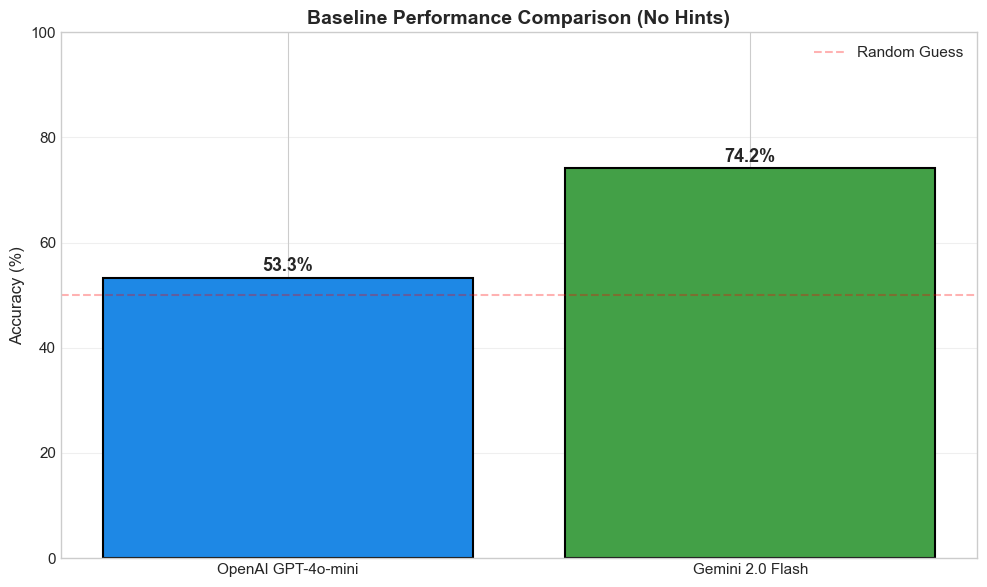


📊 OpenAI Accuracy: 53.33%
📊 Gemini Accuracy: 74.17%
📊 Difference: 20.83% (Gemini better)


In [8]:
# Calculate baseline accuracies
openai_acc = calculate_accuracy(openai_baseline)
gemini_acc = calculate_accuracy(gemini_baseline)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

models = ['OpenAI GPT-4o-mini', 'Gemini 2.0 Flash']
accuracies = [openai_acc, gemini_acc]
colors = [OPENAI_COLORS[0], GEMINI_COLORS[0]]

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=13, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Baseline Performance Comparison (No Hints)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add horizontal line at 50% for reference
ax.axhline(y=50, color='red', linestyle='--', alpha=0.3, label='Random Guess')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"\n📊 OpenAI Accuracy: {openai_acc:.2f}%")
print(f"📊 Gemini Accuracy: {gemini_acc:.2f}%")
print(f"📊 Difference: {abs(openai_acc - gemini_acc):.2f}% {'(OpenAI better)' if openai_acc > gemini_acc else '(Gemini better)'}")

## 5. Accuracy by Difficulty Level (No Hints)

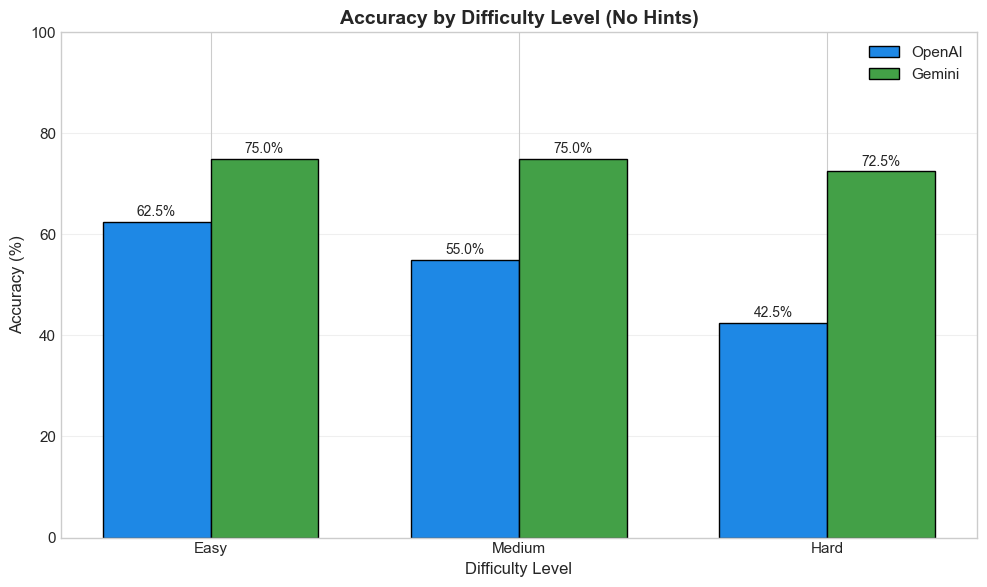

In [9]:
# Calculate accuracy by difficulty
openai_diff = calculate_metrics_by_category(openai_baseline, 'difficulty')
gemini_diff = calculate_metrics_by_category(gemini_baseline, 'difficulty')

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

difficulties = ['easy', 'medium', 'hard']
x = np.arange(len(difficulties))
width = 0.35

# Prepare data
openai_values = [openai_diff[openai_diff['difficulty'] == d]['mean'].values[0] * 100 
                 if len(openai_diff[openai_diff['difficulty'] == d]) > 0 else 0 
                 for d in difficulties]
gemini_values = [gemini_diff[gemini_diff['difficulty'] == d]['mean'].values[0] * 100 
                 if len(gemini_diff[gemini_diff['difficulty'] == d]) > 0 else 0 
                 for d in difficulties]

# Create bars
bars1 = ax.bar(x - width/2, openai_values, width, label='OpenAI', color=OPENAI_COLORS[0], edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, gemini_values, width, label='Gemini', color=GEMINI_COLORS[0], edgecolor='black', linewidth=1)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Difficulty Level', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Accuracy by Difficulty Level (No Hints)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([d.capitalize() for d in difficulties])
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 6. Accuracy by Domain (No Hints)

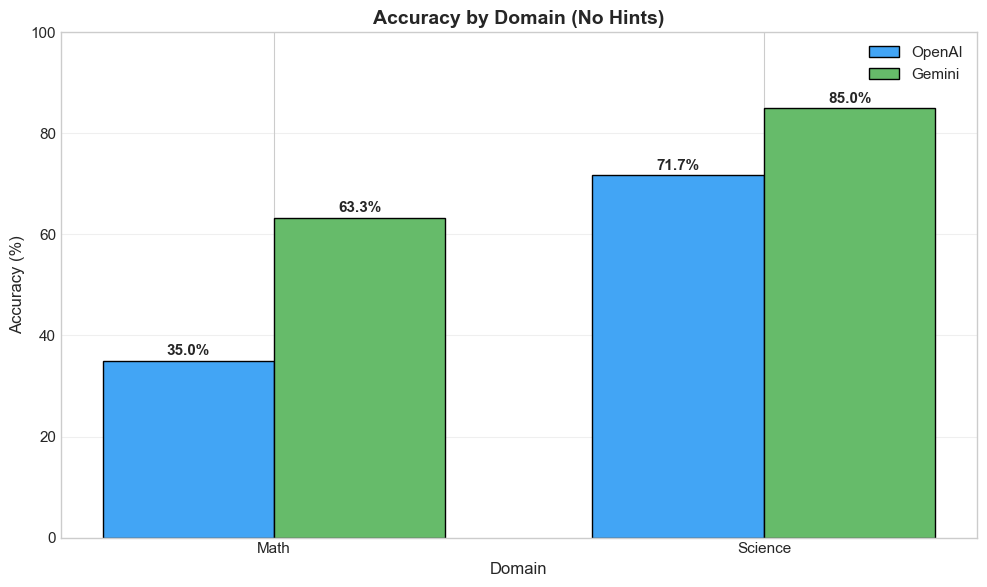

In [10]:
# Calculate accuracy by domain
openai_domain = calculate_metrics_by_category(openai_baseline, 'domain')
gemini_domain = calculate_metrics_by_category(gemini_baseline, 'domain')

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

domains = ['math', 'science']
x = np.arange(len(domains))
width = 0.35

# Prepare data
openai_values = [openai_domain[openai_domain['domain'] == d]['mean'].values[0] * 100 
                 if len(openai_domain[openai_domain['domain'] == d]) > 0 else 0 
                 for d in domains]
gemini_values = [gemini_domain[gemini_domain['domain'] == d]['mean'].values[0] * 100 
                 if len(gemini_domain[gemini_domain['domain'] == d]) > 0 else 0 
                 for d in domains]

# Create bars
bars1 = ax.bar(x - width/2, openai_values, width, label='OpenAI', color=OPENAI_COLORS[1], edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, gemini_values, width, label='Gemini', color=GEMINI_COLORS[1], edgecolor='black', linewidth=1)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Domain', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Accuracy by Domain (No Hints)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([d.capitalize() for d in domains])
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

# Part 2: Gemini Deep Dive Analysis

## 7. Gemini: Overall Accuracy Across All Conditions

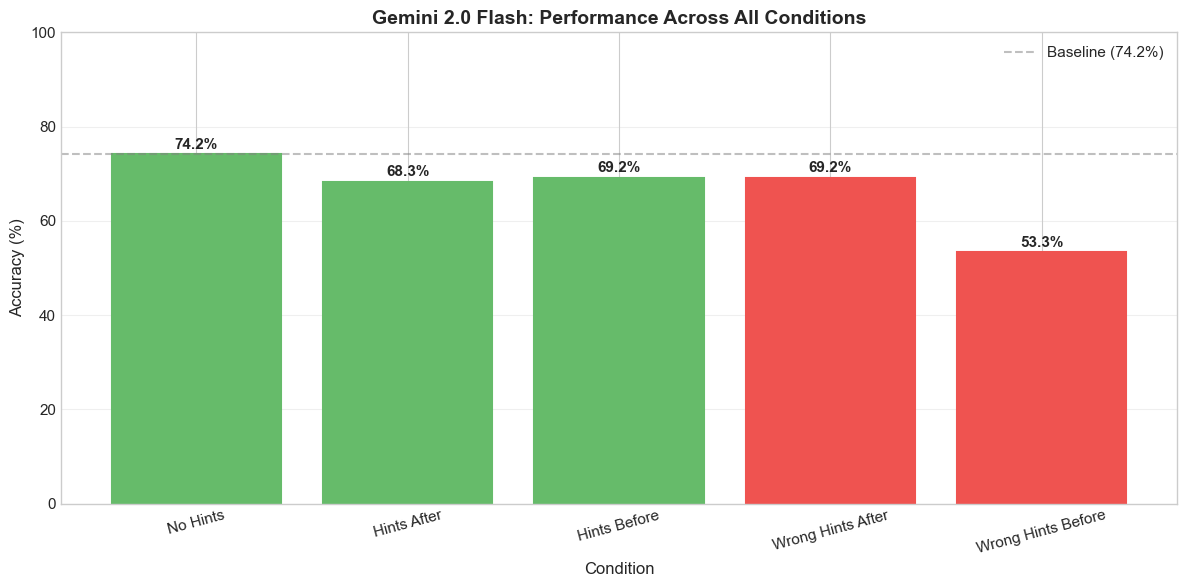

In [11]:
# Prepare data for all Gemini conditions
gemini_conditions = {
    'No Hints': gemini_baseline,
    'Hints After': gemini_hints_after,
    'Hints Before': gemini_hints_before,
    'Wrong Hints After': gemini_ic_hints_after,
    'Wrong Hints Before': gemini_ic_hints_before
}

# Calculate accuracies
conditions = []
accuracies = []
for condition, df in gemini_conditions.items():
    if df is not None:
        conditions.append(condition)
        accuracies.append(calculate_accuracy(df))

# Create visualization
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(conditions, accuracies, color=GEMINI_COLORS[0], edgecolor='black', linewidth=1.5)

# Color code by hint type
for i, (bar, condition) in enumerate(zip(bars, conditions)):
    if 'Wrong' in condition:
        bar.set_color('#EF5350')  # Red for incorrect hints
    elif 'Hints' in condition and 'Wrong' not in condition:
        bar.set_color(GEMINI_COLORS[1])  # Lighter green for correct hints
    else:
        bar.set_color(GEMINI_COLORS[0])  # Base green for no hints

# Add value labels
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Gemini 2.0 Flash: Performance Across All Conditions', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add baseline reference line
if len(accuracies) > 0:
    ax.axhline(y=accuracies[0], color='gray', linestyle='--', alpha=0.5, label=f'Baseline ({accuracies[0]:.1f}%)')
    ax.legend()

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 8. Gemini: Math Accuracy Across Conditions

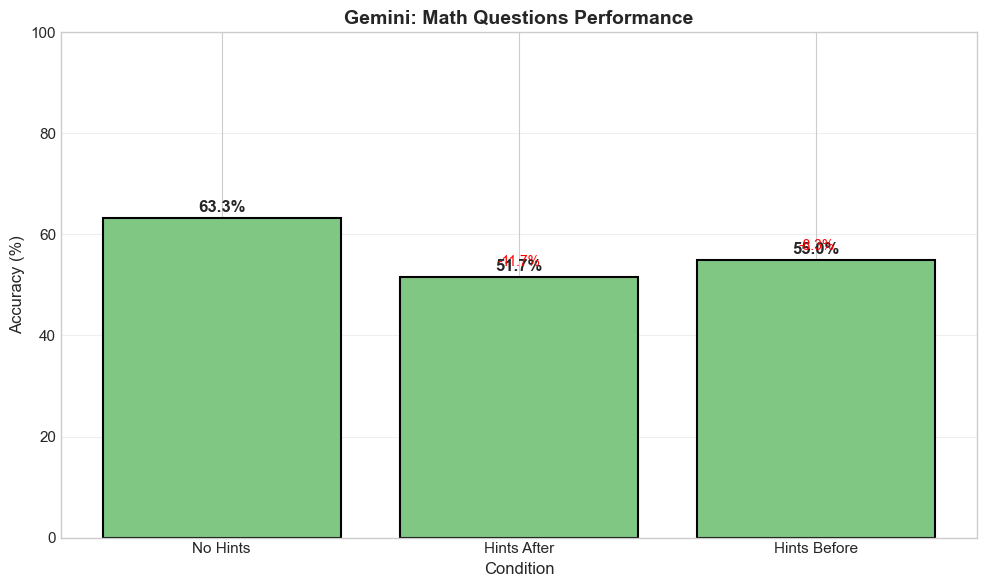

In [17]:
# Filter for math questions only
conditions_names = ['No Hints', 'Hints After', 'Hints Before']
math_accuracies = []

for condition_name, df in [(k, v) for k, v in gemini_conditions.items() if k in conditions_names]:
    if df is not None and 'domain' in df.columns:
        math_df = df[df['domain'] == 'math']
        math_accuracies.append(calculate_accuracy(math_df))
    else:
        math_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, math_accuracies, color=GEMINI_COLORS[2], edgecolor='black', linewidth=1.5)

# Add value labels
for bar, acc in zip(bars, math_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Gemini: Math Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add improvement indicators
if len(math_accuracies) > 0:
    baseline = math_accuracies[0]
    for i, acc in enumerate(math_accuracies[1:], 1):
        diff = acc - baseline
        ax.text(i, acc + 2, f'{diff:+.1f}%', ha='center', fontsize=10, 
                color='green' if diff > 0 else 'red')

plt.tight_layout()
plt.show()

## 9. Gemini: Science Accuracy Across Conditions

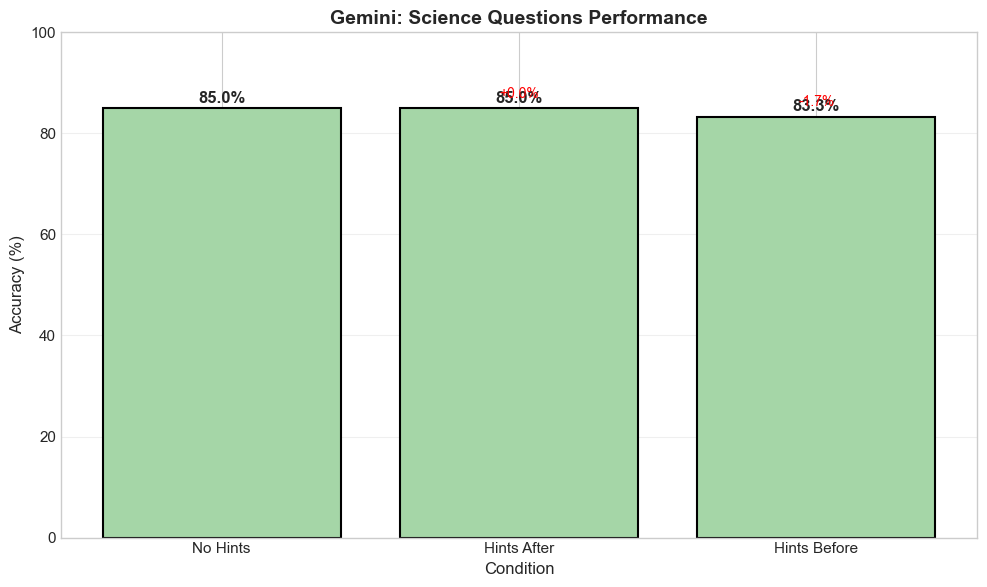

In [13]:
# Filter for science questions only
science_accuracies = []

for condition_name, df in [(k, v) for k, v in gemini_conditions.items() if k in conditions_names]:
    if df is not None and 'domain' in df.columns:
        science_df = df[df['domain'] == 'science']
        science_accuracies.append(calculate_accuracy(science_df))
    else:
        science_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, science_accuracies, color=GEMINI_COLORS[3], edgecolor='black', linewidth=1.5)

# Add value labels
for bar, acc in zip(bars, science_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Gemini: Science Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add improvement indicators
if len(science_accuracies) > 0:
    baseline = science_accuracies[0]
    for i, acc in enumerate(science_accuracies[1:], 1):
        diff = acc - baseline
        ax.text(i, acc + 2, f'{diff:+.1f}%', ha='center', fontsize=10, 
                color='green' if diff > 0 else 'red')

plt.tight_layout()
plt.show()

## 10. Gemini: Easy Questions Performance

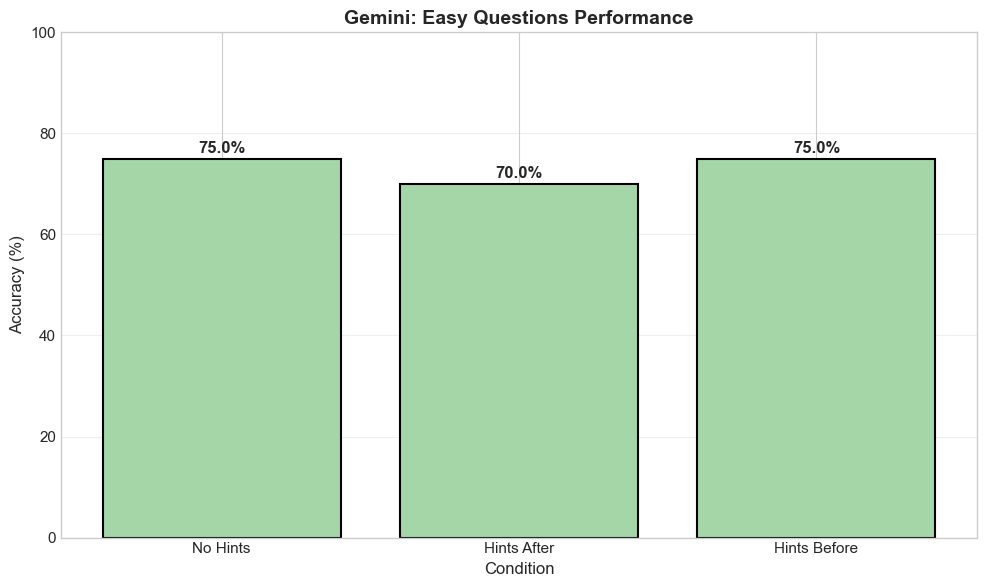

In [14]:
# Analyze easy questions
easy_accuracies = []

for condition_name, df in [(k, v) for k, v in gemini_conditions.items() if k in conditions_names]:
    if df is not None and 'difficulty' in df.columns:
        easy_df = df[df['difficulty'] == 'easy']
        easy_accuracies.append(calculate_accuracy(easy_df))
    else:
        easy_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, easy_accuracies, color='#A5D6A7', edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, easy_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Gemini: Easy Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Gemini: Medium Questions Performance

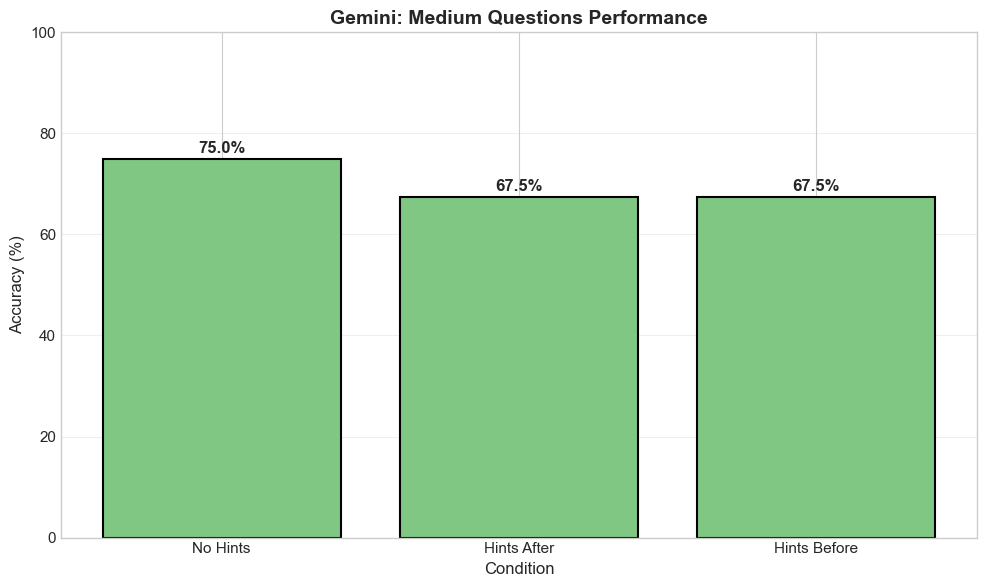

In [15]:
# Analyze medium questions
medium_accuracies = []

for condition_name, df in [(k, v) for k, v in gemini_conditions.items() if k in conditions_names]:
    if df is not None and 'difficulty' in df.columns:
        medium_df = df[df['difficulty'] == 'medium']
        medium_accuracies.append(calculate_accuracy(medium_df))
    else:
        medium_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, medium_accuracies, color='#81C784', edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, medium_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Gemini: Medium Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Gemini: Hard Questions Performance

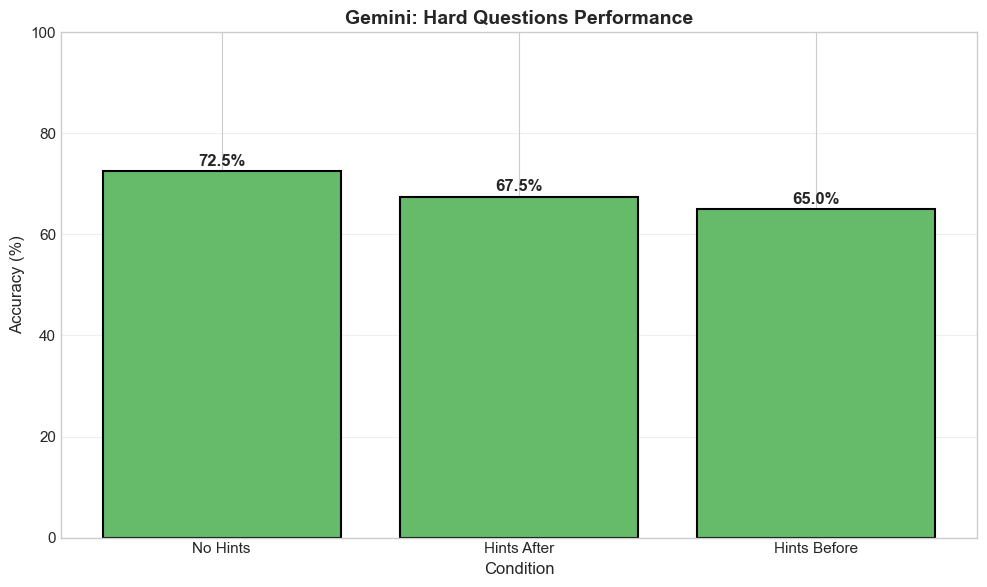

In [16]:
# Analyze hard questions
hard_accuracies = []

for condition_name, df in [(k, v) for k, v in gemini_conditions.items() if k in conditions_names]:
    if df is not None and 'difficulty' in df.columns:
        hard_df = df[df['difficulty'] == 'hard']
        hard_accuracies.append(calculate_accuracy(hard_df))
    else:
        hard_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, hard_accuracies, color='#66BB6A', edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, hard_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Gemini: Hard Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Part 3: OpenAI Deep Dive Analysis

## 13. OpenAI: Overall Accuracy Across All Conditions

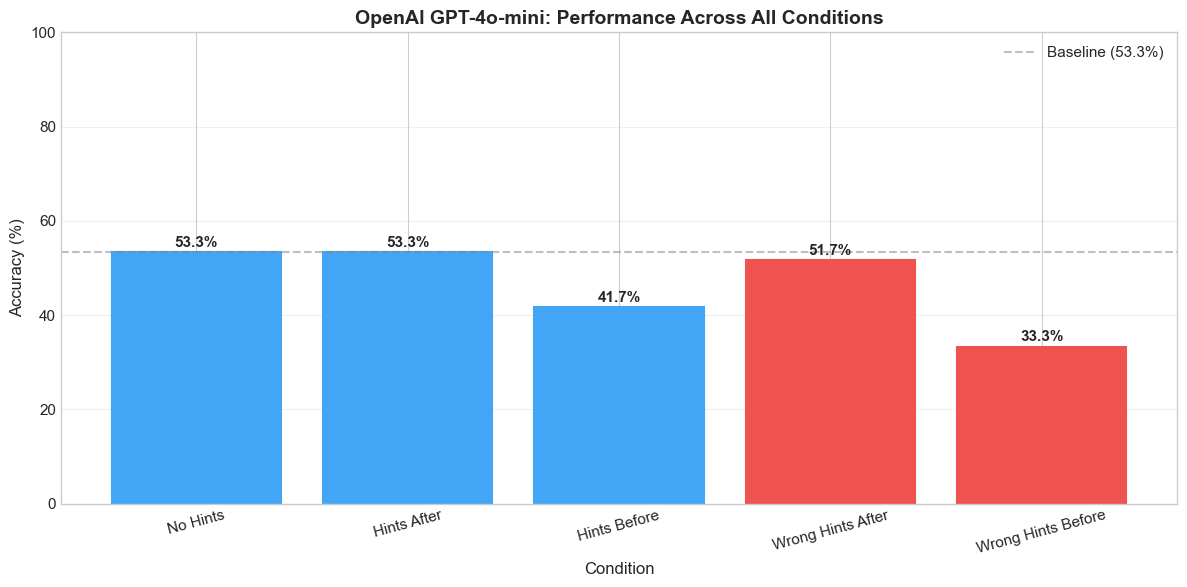

In [18]:
# Prepare data for all OpenAI conditions
openai_conditions = {
    'No Hints': openai_baseline,
    'Hints After': openai_hints_after,
    'Hints Before': openai_hints_before,
    'Wrong Hints After': openai_ic_hints_after,
    'Wrong Hints Before': openai_ic_hints_before
}

# Calculate accuracies
conditions = []
accuracies = []
for condition, df in openai_conditions.items():
    if df is not None:
        conditions.append(condition)
        accuracies.append(calculate_accuracy(df))

# Create visualization
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(conditions, accuracies, color=OPENAI_COLORS[0], edgecolor='black', linewidth=1.5)

# Color code by hint type
for i, (bar, condition) in enumerate(zip(bars, conditions)):
    if 'Wrong' in condition:
        bar.set_color('#EF5350')  # Red for incorrect hints
    elif 'Hints' in condition and 'Wrong' not in condition:
        bar.set_color(OPENAI_COLORS[1])  # Lighter blue for correct hints
    else:
        bar.set_color(OPENAI_COLORS[0])  # Base blue for no hints

# Add value labels
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('OpenAI GPT-4o-mini: Performance Across All Conditions', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add baseline reference line
if len(accuracies) > 0:
    ax.axhline(y=accuracies[0], color='gray', linestyle='--', alpha=0.5, label=f'Baseline ({accuracies[0]:.1f}%)')
    ax.legend()

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 14. OpenAI: Math Accuracy Across Conditions

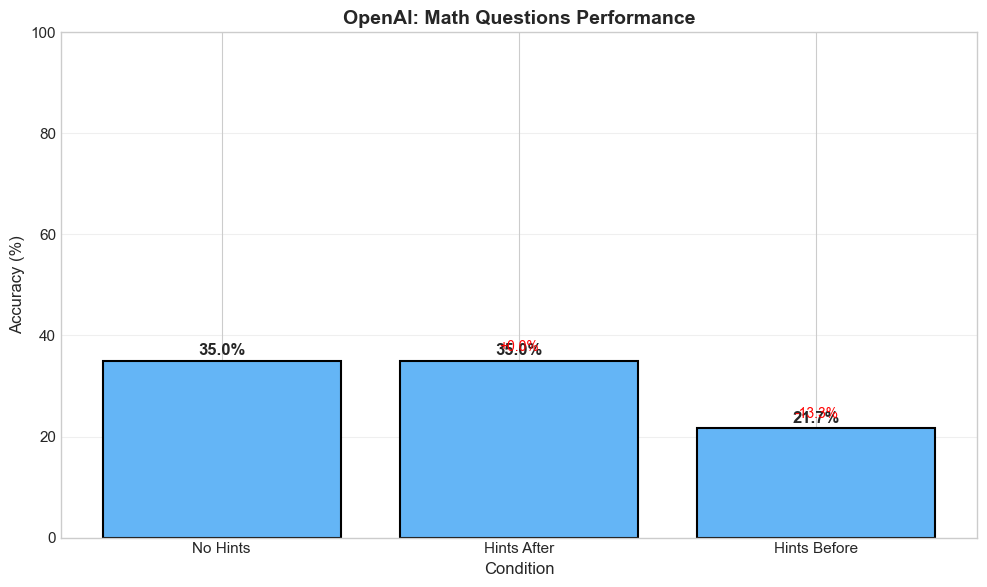

In [19]:
# Filter for math questions only
math_accuracies = []

for condition_name, df in [(k, v) for k, v in openai_conditions.items() if k in conditions_names]:
    if df is not None and 'domain' in df.columns:
        math_df = df[df['domain'] == 'math']
        math_accuracies.append(calculate_accuracy(math_df))
    else:
        math_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, math_accuracies, color=OPENAI_COLORS[2], edgecolor='black', linewidth=1.5)

# Add value labels
for bar, acc in zip(bars, math_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('OpenAI: Math Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add improvement indicators
if len(math_accuracies) > 0:
    baseline = math_accuracies[0]
    for i, acc in enumerate(math_accuracies[1:], 1):
        diff = acc - baseline
        ax.text(i, acc + 2, f'{diff:+.1f}%', ha='center', fontsize=10, 
                color='green' if diff > 0 else 'red')

plt.tight_layout()
plt.show()

## 15. OpenAI: Science Accuracy Across Conditions

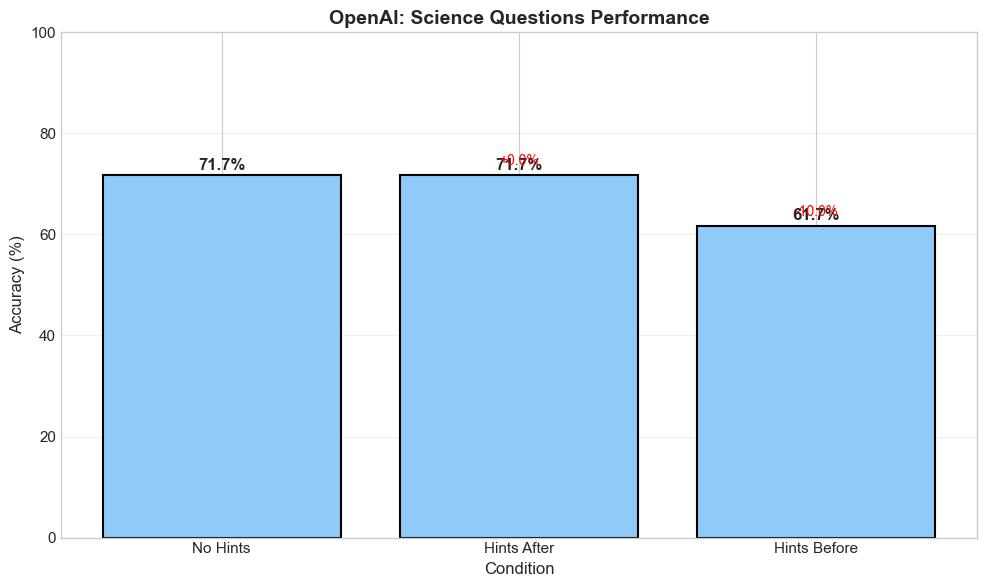

In [20]:
# Filter for science questions only
science_accuracies = []

for condition_name, df in [(k, v) for k, v in openai_conditions.items() if k in conditions_names]:
    if df is not None and 'domain' in df.columns:
        science_df = df[df['domain'] == 'science']
        science_accuracies.append(calculate_accuracy(science_df))
    else:
        science_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, science_accuracies, color=OPENAI_COLORS[3], edgecolor='black', linewidth=1.5)

# Add value labels
for bar, acc in zip(bars, science_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('OpenAI: Science Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add improvement indicators
if len(science_accuracies) > 0:
    baseline = science_accuracies[0]
    for i, acc in enumerate(science_accuracies[1:], 1):
        diff = acc - baseline
        ax.text(i, acc + 2, f'{diff:+.1f}%', ha='center', fontsize=10, 
                color='green' if diff > 0 else 'red')

plt.tight_layout()
plt.show()

## 16. OpenAI: Easy Questions Performance

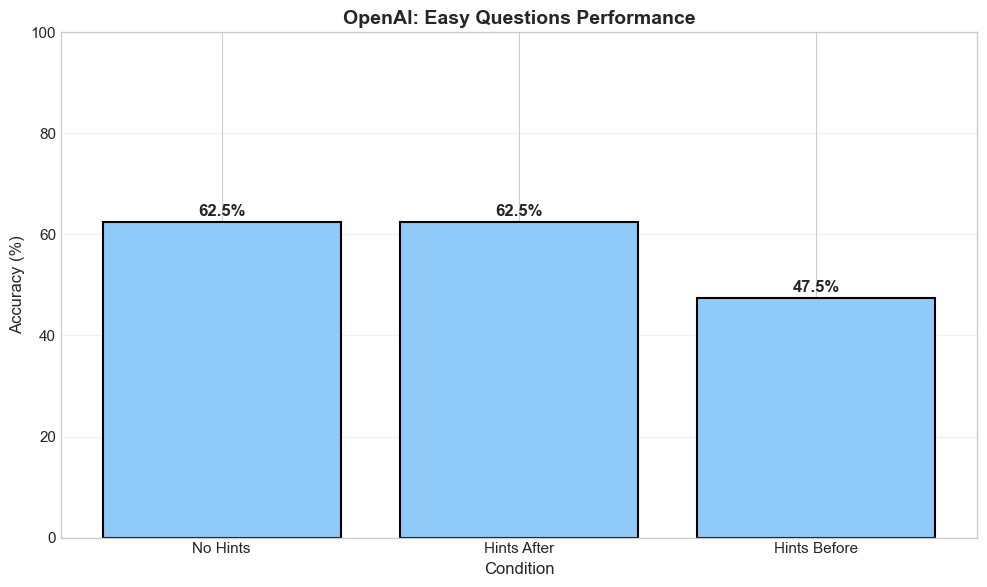

In [21]:
# Analyze easy questions
easy_accuracies = []

for condition_name, df in [(k, v) for k, v in openai_conditions.items() if k in conditions_names]:
    if df is not None and 'difficulty' in df.columns:
        easy_df = df[df['difficulty'] == 'easy']
        easy_accuracies.append(calculate_accuracy(easy_df))
    else:
        easy_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, easy_accuracies, color='#90CAF9', edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, easy_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('OpenAI: Easy Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 17. OpenAI: Medium Questions Performance

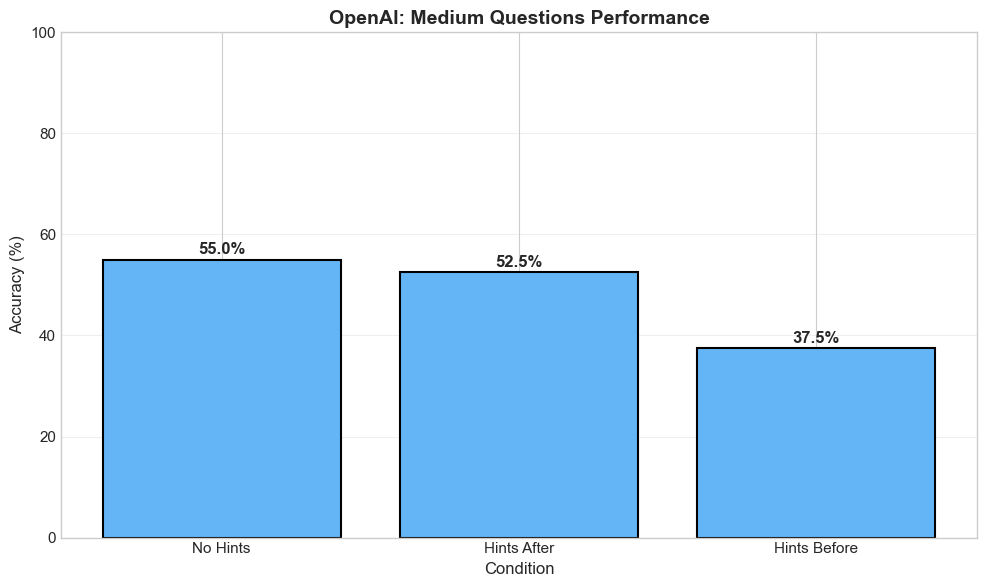

In [22]:
# Analyze medium questions
medium_accuracies = []

for condition_name, df in [(k, v) for k, v in openai_conditions.items() if k in conditions_names]:
    if df is not None and 'difficulty' in df.columns:
        medium_df = df[df['difficulty'] == 'medium']
        medium_accuracies.append(calculate_accuracy(medium_df))
    else:
        medium_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, medium_accuracies, color='#64B5F6', edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, medium_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('OpenAI: Medium Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 18. OpenAI: Hard Questions Performance

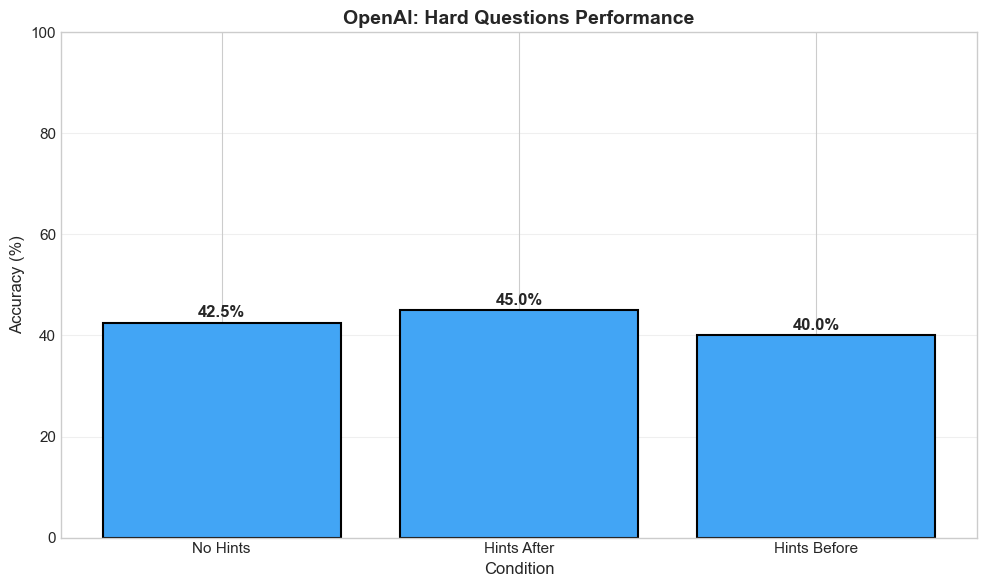

In [23]:
# Analyze hard questions
hard_accuracies = []

for condition_name, df in [(k, v) for k, v in openai_conditions.items() if k in conditions_names]:
    if df is not None and 'difficulty' in df.columns:
        hard_df = df[df['difficulty'] == 'hard']
        hard_accuracies.append(calculate_accuracy(hard_df))
    else:
        hard_accuracies.append(0)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(conditions_names, hard_accuracies, color='#42A5F5', edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, hard_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('OpenAI: Hard Questions Performance', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Part 4: Head-to-Head Comparisons

## 19. No Hints: OpenAI vs Gemini Comparison

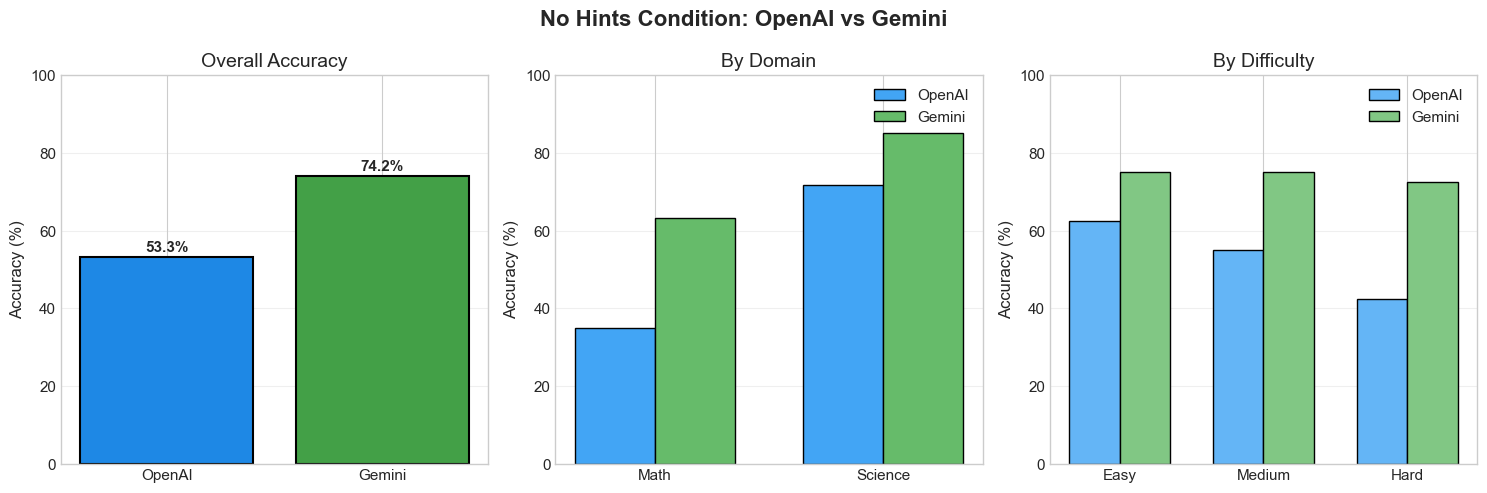

In [24]:
# Comprehensive comparison for No Hints condition
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Overall accuracy
ax1 = axes[0]
models = ['OpenAI', 'Gemini']
no_hint_accs = [calculate_accuracy(openai_baseline), calculate_accuracy(gemini_baseline)]
bars1 = ax1.bar(models, no_hint_accs, color=[OPENAI_COLORS[0], GEMINI_COLORS[0]], edgecolor='black', linewidth=1.5)
for bar, acc in zip(bars1, no_hint_accs):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Overall Accuracy')
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)

# By Domain
ax2 = axes[1]
domains = ['Math', 'Science']
x = np.arange(len(domains))
width = 0.35

openai_domain_accs = []
gemini_domain_accs = []
for domain in ['math', 'science']:
    if openai_baseline is not None:
        openai_domain_accs.append(calculate_accuracy(openai_baseline[openai_baseline['domain'] == domain]))
    else:
        openai_domain_accs.append(0)
    if gemini_baseline is not None:
        gemini_domain_accs.append(calculate_accuracy(gemini_baseline[gemini_baseline['domain'] == domain]))
    else:
        gemini_domain_accs.append(0)

ax2.bar(x - width/2, openai_domain_accs, width, label='OpenAI', color=OPENAI_COLORS[1], edgecolor='black')
ax2.bar(x + width/2, gemini_domain_accs, width, label='Gemini', color=GEMINI_COLORS[1], edgecolor='black')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('By Domain')
ax2.set_xticks(x)
ax2.set_xticklabels(domains)
ax2.legend()
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

# By Difficulty
ax3 = axes[2]
difficulties = ['Easy', 'Medium', 'Hard']
x = np.arange(len(difficulties))

openai_diff_accs = []
gemini_diff_accs = []
for diff in ['easy', 'medium', 'hard']:
    if openai_baseline is not None:
        openai_diff_accs.append(calculate_accuracy(openai_baseline[openai_baseline['difficulty'] == diff]))
    else:
        openai_diff_accs.append(0)
    if gemini_baseline is not None:
        gemini_diff_accs.append(calculate_accuracy(gemini_baseline[gemini_baseline['difficulty'] == diff]))
    else:
        gemini_diff_accs.append(0)

ax3.bar(x - width/2, openai_diff_accs, width, label='OpenAI', color=OPENAI_COLORS[2], edgecolor='black')
ax3.bar(x + width/2, gemini_diff_accs, width, label='Gemini', color=GEMINI_COLORS[2], edgecolor='black')
ax3.set_ylabel('Accuracy (%)')
ax3.set_title('By Difficulty')
ax3.set_xticks(x)
ax3.set_xticklabels(difficulties)
ax3.legend()
ax3.set_ylim(0, 100)
ax3.grid(axis='y', alpha=0.3)

plt.suptitle('No Hints Condition: OpenAI vs Gemini', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 20. Hints After: OpenAI vs Gemini Comparison

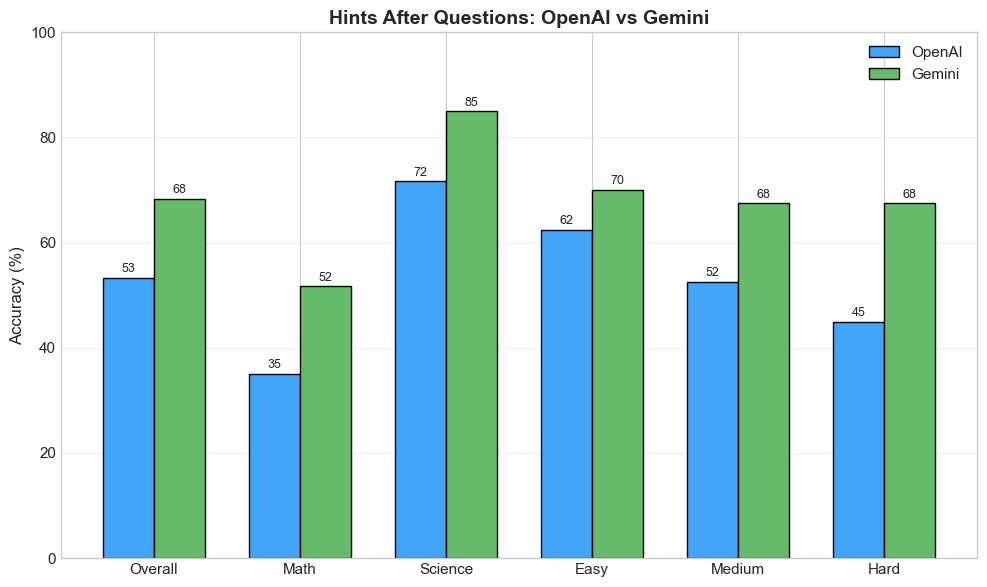

In [25]:
# Comparison for Hints After condition
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Overall', 'Math', 'Science', 'Easy', 'Medium', 'Hard']
x = np.arange(len(categories))
width = 0.35

# Calculate accuracies for each category
openai_accs = []
gemini_accs = []

# Overall
openai_accs.append(calculate_accuracy(openai_hints_after))
gemini_accs.append(calculate_accuracy(gemini_hints_after))

# By domain
for domain in ['math', 'science']:
    if openai_hints_after is not None:
        openai_accs.append(calculate_accuracy(openai_hints_after[openai_hints_after['domain'] == domain]))
    else:
        openai_accs.append(0)
    if gemini_hints_after is not None:
        gemini_accs.append(calculate_accuracy(gemini_hints_after[gemini_hints_after['domain'] == domain]))
    else:
        gemini_accs.append(0)

# By difficulty
for diff in ['easy', 'medium', 'hard']:
    if openai_hints_after is not None:
        openai_accs.append(calculate_accuracy(openai_hints_after[openai_hints_after['difficulty'] == diff]))
    else:
        openai_accs.append(0)
    if gemini_hints_after is not None:
        gemini_accs.append(calculate_accuracy(gemini_hints_after[gemini_hints_after['difficulty'] == diff]))
    else:
        gemini_accs.append(0)

# Create bars
bars1 = ax.bar(x - width/2, openai_accs, width, label='OpenAI', color=OPENAI_COLORS[1], edgecolor='black')
bars2 = ax.bar(x + width/2, gemini_accs, width, label='Gemini', color=GEMINI_COLORS[1], edgecolor='black')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.0f}', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Hints After Questions: OpenAI vs Gemini', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 21. Hints Before: OpenAI vs Gemini Comparison

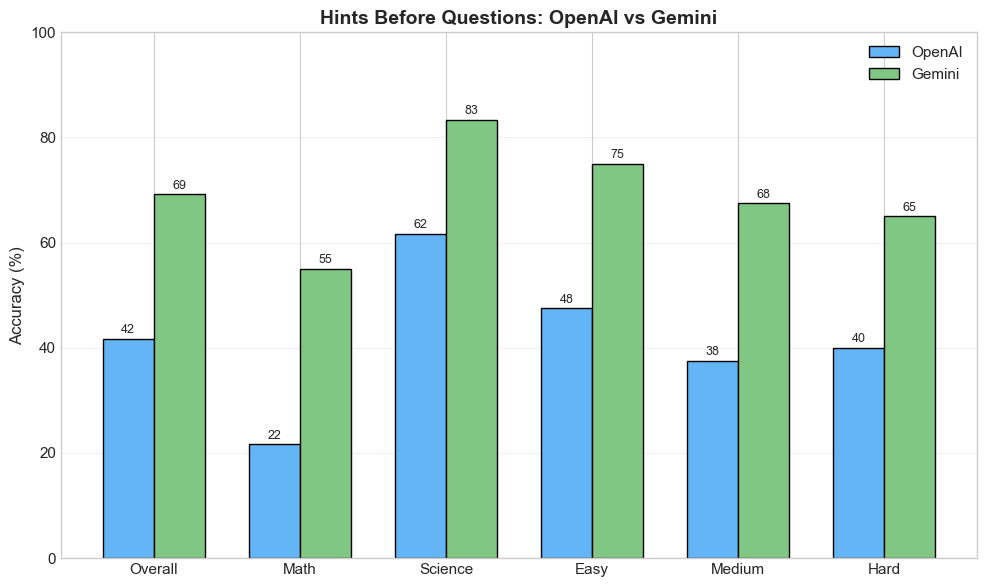

In [26]:
# Comparison for Hints Before condition
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Overall', 'Math', 'Science', 'Easy', 'Medium', 'Hard']
x = np.arange(len(categories))
width = 0.35

# Calculate accuracies for each category
openai_accs = []
gemini_accs = []

# Overall
openai_accs.append(calculate_accuracy(openai_hints_before))
gemini_accs.append(calculate_accuracy(gemini_hints_before))

# By domain
for domain in ['math', 'science']:
    if openai_hints_before is not None:
        openai_accs.append(calculate_accuracy(openai_hints_before[openai_hints_before['domain'] == domain]))
    else:
        openai_accs.append(0)
    if gemini_hints_before is not None:
        gemini_accs.append(calculate_accuracy(gemini_hints_before[gemini_hints_before['domain'] == domain]))
    else:
        gemini_accs.append(0)

# By difficulty
for diff in ['easy', 'medium', 'hard']:
    if openai_hints_before is not None:
        openai_accs.append(calculate_accuracy(openai_hints_before[openai_hints_before['difficulty'] == diff]))
    else:
        openai_accs.append(0)
    if gemini_hints_before is not None:
        gemini_accs.append(calculate_accuracy(gemini_hints_before[gemini_hints_before['difficulty'] == diff]))
    else:
        gemini_accs.append(0)

# Create bars
bars1 = ax.bar(x - width/2, openai_accs, width, label='OpenAI', color=OPENAI_COLORS[2], edgecolor='black')
bars2 = ax.bar(x + width/2, gemini_accs, width, label='Gemini', color=GEMINI_COLORS[2], edgecolor='black')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.0f}', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Hints Before Questions: OpenAI vs Gemini', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 22. Hint Effectiveness: Improvement from Baseline

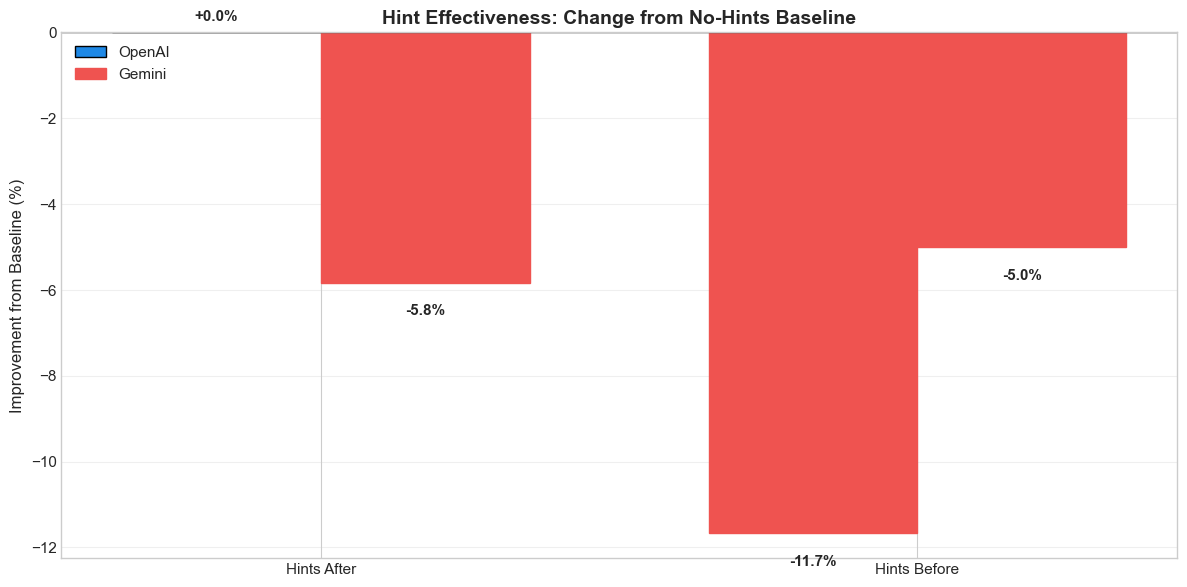

In [27]:
# Calculate improvements from baseline
fig, ax = plt.subplots(figsize=(12, 6))

conditions = ['Hints After', 'Hints Before']
x = np.arange(len(conditions))
width = 0.35

# Calculate improvements
openai_base = calculate_accuracy(openai_baseline)
gemini_base = calculate_accuracy(gemini_baseline)

openai_improvements = [
    calculate_accuracy(openai_hints_after) - openai_base,
    calculate_accuracy(openai_hints_before) - openai_base
]

gemini_improvements = [
    calculate_accuracy(gemini_hints_after) - gemini_base,
    calculate_accuracy(gemini_hints_before) - gemini_base
]

# Create bars
bars1 = ax.bar(x - width/2, openai_improvements, width, label='OpenAI', color=OPENAI_COLORS[0], edgecolor='black')
bars2 = ax.bar(x + width/2, gemini_improvements, width, label='Gemini', color=GEMINI_COLORS[0], edgecolor='black')

# Color bars based on positive/negative
for bars in [bars1, bars2]:
    for bar in bars:
        if bar.get_height() < 0:
            bar.set_color('#EF5350')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        y_pos = height + 0.2 if height >= 0 else height - 0.5
        ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{height:+.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')

# Add zero line
ax.axhline(y=0, color='black', linewidth=1)

ax.set_ylabel('Improvement from Baseline (%)', fontsize=12)
ax.set_title('Hint Effectiveness: Change from No-Hints Baseline', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 23. Summary Statistics Table

In [28]:
# Create comprehensive summary table
summary_data = []

# Collect all metrics
for model_name, model_data in [('OpenAI', openai_conditions), ('Gemini', gemini_conditions)]:
    for condition_name, df in model_data.items():
        if df is not None:
            row = {
                'Model': model_name,
                'Condition': condition_name,
                'Overall Acc': f"{calculate_accuracy(df):.1f}%",
                'Math Acc': f"{calculate_accuracy(df[df['domain'] == 'math']):.1f}%" if 'domain' in df.columns else 'N/A',
                'Science Acc': f"{calculate_accuracy(df[df['domain'] == 'science']):.1f}%" if 'domain' in df.columns else 'N/A',
                'Easy Acc': f"{calculate_accuracy(df[df['difficulty'] == 'easy']):.1f}%" if 'difficulty' in df.columns else 'N/A',
                'Medium Acc': f"{calculate_accuracy(df[df['difficulty'] == 'medium']):.1f}%" if 'difficulty' in df.columns else 'N/A',
                'Hard Acc': f"{calculate_accuracy(df[df['difficulty'] == 'hard']):.1f}%" if 'difficulty' in df.columns else 'N/A',
                'Sample Size': len(df)
            }
            summary_data.append(row)

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display with styling
print("\n" + "="*100)
print("COMPREHENSIVE RESULTS SUMMARY")
print("="*100)

# Display by model
for model in ['OpenAI', 'Gemini']:
    print(f"\n{model} Results:")
    print("-" * 50)
    model_df = summary_df[summary_df['Model'] == model]
    print(model_df.to_string(index=False))

# Key insights
print("\n" + "="*100)
print("KEY FINDINGS")
print("="*100)

# Calculate best performing conditions
best_openai = summary_df[summary_df['Model'] == 'OpenAI'].iloc[0]['Condition']
best_gemini = summary_df[summary_df['Model'] == 'Gemini'].iloc[0]['Condition']

print(f"\n1. Best performing condition for OpenAI: {best_openai}")
print(f"2. Best performing condition for Gemini: {best_gemini}")
print(f"3. Hints generally {'improve' if calculate_accuracy(openai_hints_after) > calculate_accuracy(openai_baseline) else 'decrease'} OpenAI performance")
print(f"4. Hints generally {'improve' if calculate_accuracy(gemini_hints_after) > calculate_accuracy(gemini_baseline) else 'decrease'} Gemini performance")

# Export summary
summary_df.to_csv('final_analysis_summary.csv', index=False)
print("\n✅ Summary saved to 'final_analysis_summary.csv'")


COMPREHENSIVE RESULTS SUMMARY

OpenAI Results:
--------------------------------------------------
 Model          Condition Overall Acc Math Acc Science Acc Easy Acc Medium Acc Hard Acc  Sample Size
OpenAI           No Hints       53.3%    35.0%       71.7%    62.5%      55.0%    42.5%          120
OpenAI        Hints After       53.3%    35.0%       71.7%    62.5%      52.5%    45.0%          120
OpenAI       Hints Before       41.7%    21.7%       61.7%    47.5%      37.5%    40.0%          120
OpenAI  Wrong Hints After       51.7%    35.0%       68.3%    57.5%      52.5%    45.0%          120
OpenAI Wrong Hints Before       33.3%    16.7%       50.0%    30.0%      35.0%    35.0%          120

Gemini Results:
--------------------------------------------------
 Model          Condition Overall Acc Math Acc Science Acc Easy Acc Medium Acc Hard Acc  Sample Size
Gemini           No Hints       74.2%    63.3%       85.0%    75.0%      75.0%    72.5%          120
Gemini        Hints After

## 24. Final Visualization: Complete Performance Matrix

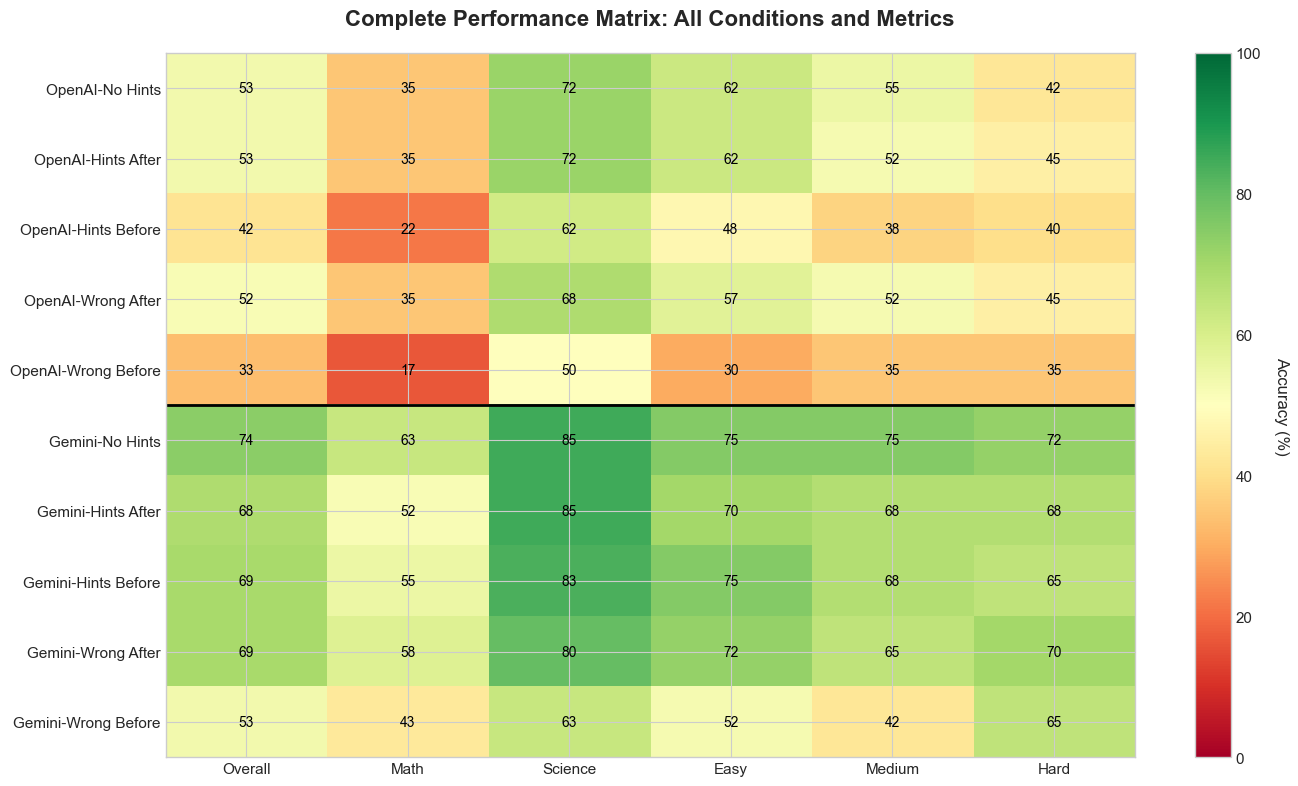


🎉 Analysis Complete! All visualizations generated successfully.


In [29]:
# Create heatmap of all results
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for heatmap
conditions_list = ['No Hints', 'Hints After', 'Hints Before', 'Wrong After', 'Wrong Before']
metrics_list = ['Overall', 'Math', 'Science', 'Easy', 'Medium', 'Hard']

# Create matrices for each model
openai_matrix = []
gemini_matrix = []

for condition in conditions_list:
    # Map condition names
    if condition == 'Wrong After':
        openai_df = openai_ic_hints_after
        gemini_df = gemini_ic_hints_after
    elif condition == 'Wrong Before':
        openai_df = openai_ic_hints_before
        gemini_df = gemini_ic_hints_before
    else:
        condition_key = condition
        openai_df = openai_conditions.get(condition_key)
        gemini_df = gemini_conditions.get(condition_key)
    
    openai_row = []
    gemini_row = []
    
    # Overall
    openai_row.append(calculate_accuracy(openai_df) if openai_df is not None else 0)
    gemini_row.append(calculate_accuracy(gemini_df) if gemini_df is not None else 0)
    
    # Domains
    for domain in ['math', 'science']:
        if openai_df is not None and 'domain' in openai_df.columns:
            openai_row.append(calculate_accuracy(openai_df[openai_df['domain'] == domain]))
        else:
            openai_row.append(0)
        if gemini_df is not None and 'domain' in gemini_df.columns:
            gemini_row.append(calculate_accuracy(gemini_df[gemini_df['domain'] == domain]))
        else:
            gemini_row.append(0)
    
    # Difficulties
    for diff in ['easy', 'medium', 'hard']:
        if openai_df is not None and 'difficulty' in openai_df.columns:
            openai_row.append(calculate_accuracy(openai_df[openai_df['difficulty'] == diff]))
        else:
            openai_row.append(0)
        if gemini_df is not None and 'difficulty' in gemini_df.columns:
            gemini_row.append(calculate_accuracy(gemini_df[gemini_df['difficulty'] == diff]))
        else:
            gemini_row.append(0)
    
    openai_matrix.append(openai_row)
    gemini_matrix.append(gemini_row)

# Create combined matrix
combined_matrix = np.array(openai_matrix + gemini_matrix)

# Create heatmap
im = ax.imshow(combined_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)

# Set ticks
ax.set_xticks(np.arange(len(metrics_list)))
ax.set_yticks(np.arange(len(conditions_list) * 2))
ax.set_xticklabels(metrics_list)
y_labels = [f'OpenAI-{c}' for c in conditions_list] + [f'Gemini-{c}' for c in conditions_list]
ax.set_yticklabels(y_labels)

# Add text annotations
for i in range(len(y_labels)):
    for j in range(len(metrics_list)):
        text = ax.text(j, i, f'{combined_matrix[i, j]:.0f}',
                      ha='center', va='center', color='black', fontsize=10)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Accuracy (%)', rotation=270, labelpad=20)

ax.set_title('Complete Performance Matrix: All Conditions and Metrics', fontsize=16, fontweight='bold', pad=20)

# Add dividing line between models
ax.axhline(y=4.5, color='black', linewidth=2)

plt.tight_layout()
plt.show()

print("\n🎉 Analysis Complete! All visualizations generated successfully.")

## 25. Comprehensive Model Comparison - All Conditions

Final comparison showing both models across all experimental conditions with color-coded bars:
- Gray: Baseline (no hints)
- Green: Correct hints
- Red: Incorrect hints

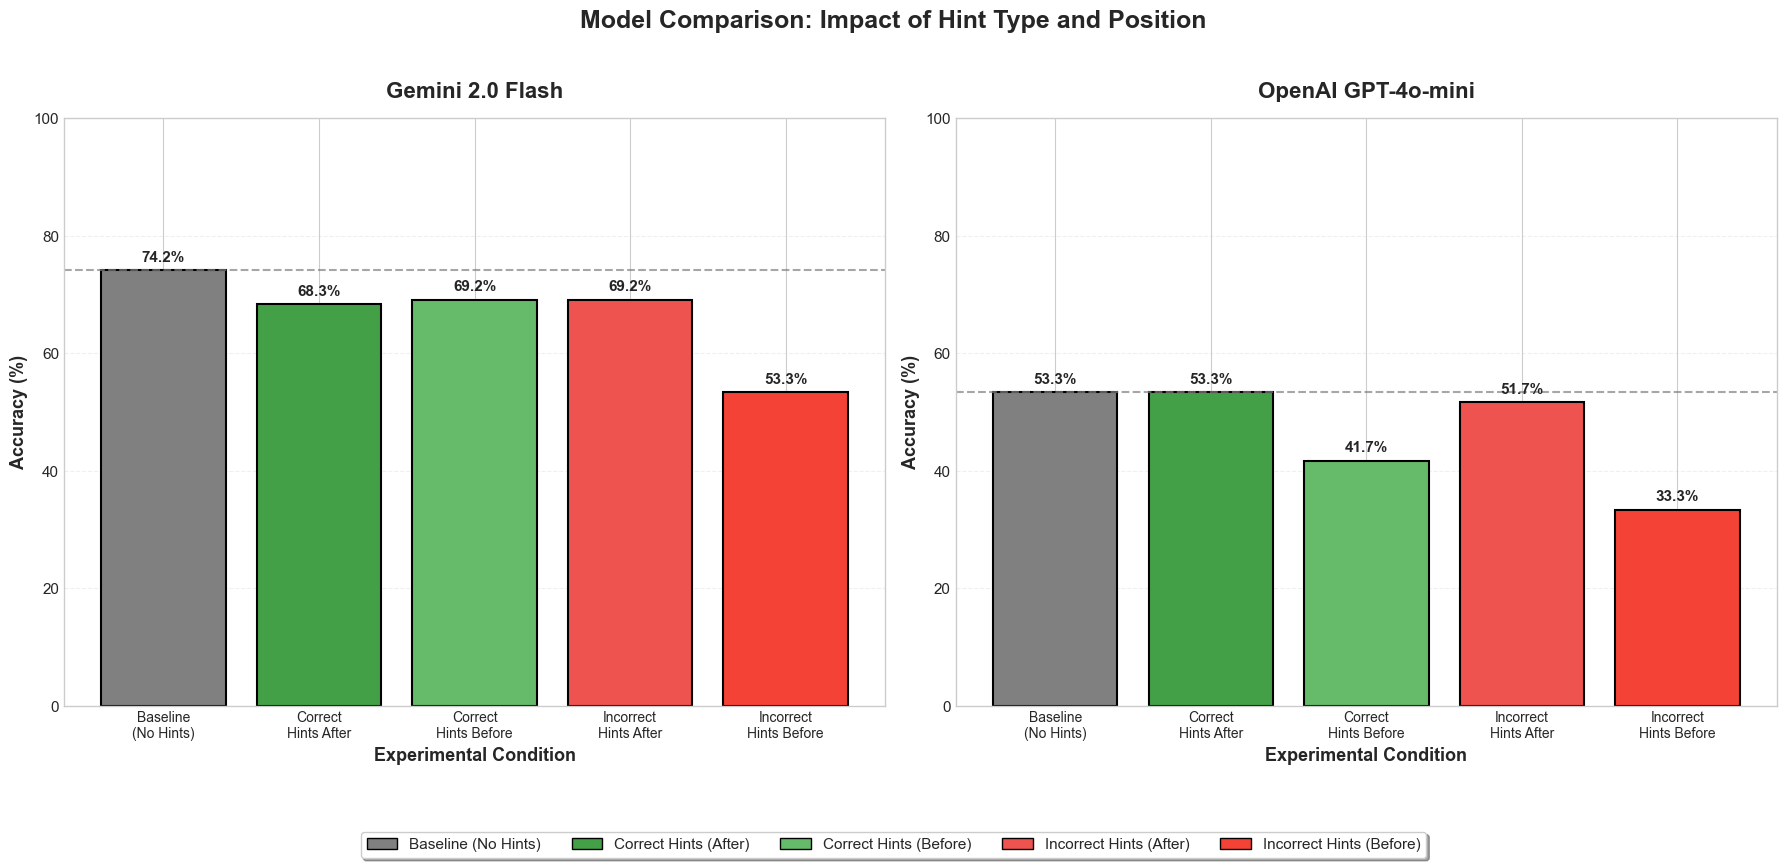


SUMMARY STATISTICS

📊 Gemini 2.0 Flash:
  Baseline: 74.2%
  Correct Hints After: 68.3% (-5.8pp vs baseline)
  Correct Hints Before: 69.2% (-5.0pp vs baseline)
  Incorrect Hints After: 69.2% (-5.0pp vs baseline)
  Incorrect Hints Before: 53.3% (-20.8pp vs baseline)

📊 OpenAI GPT-4o-mini:
  Baseline: 53.3%
  Correct Hints After: 53.3% (+0.0pp vs baseline)
  Correct Hints Before: 41.7% (-11.7pp vs baseline)
  Incorrect Hints After: 51.7% (-1.7pp vs baseline)
  Incorrect Hints Before: 33.3% (-20.0pp vs baseline)

🔍 Key Insights:
  • Baseline: Gemini leads by 20.8pp
  • Correct Hints (Before vs After): Gemini +0.8pp, OpenAI -11.7pp
  • Incorrect Hints (Before vs After): Gemini -15.8pp, OpenAI -18.3pp
  • Susceptibility to incorrect hints: Gemini -12.9pp, OpenAI -10.8pp


In [31]:
# Comprehensive comparison of both models across all conditions
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Model Comparison: Impact of Hint Type and Position', fontsize=18, fontweight='bold', y=1.02)

# Prepare data
conditions = ['Baseline\n(No Hints)', 'Correct\nHints After', 'Correct\nHints Before', 
              'Incorrect\nHints After', 'Incorrect\nHints Before']

# Calculate accuracies for Gemini
gemini_accuracies = [
    calculate_accuracy(gemini_baseline),          # Baseline
    calculate_accuracy(gemini_hints_after),       # Correct After
    calculate_accuracy(gemini_hints_before),      # Correct Before
    calculate_accuracy(gemini_ic_hints_after),    # Incorrect After
    calculate_accuracy(gemini_ic_hints_before)    # Incorrect Before
]

# Calculate accuracies for OpenAI
openai_accuracies = [
    calculate_accuracy(openai_baseline),          # Baseline
    calculate_accuracy(openai_hints_after),       # Correct After
    calculate_accuracy(openai_hints_before),      # Correct Before
    calculate_accuracy(openai_ic_hints_after),    # Incorrect After
    calculate_accuracy(openai_ic_hints_before)    # Incorrect Before
]

# Define colors for each condition
colors = ['#808080', '#43A047', '#66BB6A', '#EF5350', '#F44336']  # Gray, Green, Light Green, Red, Light Red

# Left plot - Gemini
ax1 = axes[0]
x = np.arange(len(conditions))
bars1 = ax1.bar(x, gemini_accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Experimental Condition', fontsize=13, fontweight='bold')
ax1.set_title('Gemini 2.0 Flash', fontsize=16, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(conditions, fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, 100)
ax1.axhline(y=gemini_accuracies[0], color='gray', linestyle='--', alpha=0.7, linewidth=1.5, label='Baseline')

# Right plot - OpenAI
ax2 = axes[1]
bars2 = ax2.bar(x, openai_accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Experimental Condition', fontsize=13, fontweight='bold')
ax2.set_title('OpenAI GPT-4o-mini', fontsize=16, fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(conditions, fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 100)
ax2.axhline(y=openai_accuracies[0], color='gray', linestyle='--', alpha=0.7, linewidth=1.5, label='Baseline')

# Add a shared legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#808080', edgecolor='black', label='Baseline (No Hints)'),
    Patch(facecolor='#43A047', edgecolor='black', label='Correct Hints (After)'),
    Patch(facecolor='#66BB6A', edgecolor='black', label='Correct Hints (Before)'),
    Patch(facecolor='#EF5350', edgecolor='black', label='Incorrect Hints (After)'),
    Patch(facecolor='#F44336', edgecolor='black', label='Incorrect Hints (Before)')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=5, fontsize=11, 
           bbox_to_anchor=(0.5, -0.05), frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

# Print summary statistics
print('\n' + '='*70)
print('SUMMARY STATISTICS')
print('='*70)

print('\n📊 Gemini 2.0 Flash:')
print(f'  Baseline: {gemini_accuracies[0]:.1f}%')
print(f'  Correct Hints After: {gemini_accuracies[1]:.1f}% ({gemini_accuracies[1] - gemini_accuracies[0]:+.1f}pp vs baseline)')
print(f'  Correct Hints Before: {gemini_accuracies[2]:.1f}% ({gemini_accuracies[2] - gemini_accuracies[0]:+.1f}pp vs baseline)')
print(f'  Incorrect Hints After: {gemini_accuracies[3]:.1f}% ({gemini_accuracies[3] - gemini_accuracies[0]:+.1f}pp vs baseline)')
print(f'  Incorrect Hints Before: {gemini_accuracies[4]:.1f}% ({gemini_accuracies[4] - gemini_accuracies[0]:+.1f}pp vs baseline)')

print('\n📊 OpenAI GPT-4o-mini:')
print(f'  Baseline: {openai_accuracies[0]:.1f}%')
print(f'  Correct Hints After: {openai_accuracies[1]:.1f}% ({openai_accuracies[1] - openai_accuracies[0]:+.1f}pp vs baseline)')
print(f'  Correct Hints Before: {openai_accuracies[2]:.1f}% ({openai_accuracies[2] - openai_accuracies[0]:+.1f}pp vs baseline)')
print(f'  Incorrect Hints After: {openai_accuracies[3]:.1f}% ({openai_accuracies[3] - openai_accuracies[0]:+.1f}pp vs baseline)')
print(f'  Incorrect Hints Before: {openai_accuracies[4]:.1f}% ({openai_accuracies[4] - openai_accuracies[0]:+.1f}pp vs baseline)')

print('\n🔍 Key Insights:')
baseline_diff = gemini_accuracies[0] - openai_accuracies[0]
if baseline_diff > 0:
    print(f'  • Baseline: Gemini leads by {baseline_diff:.1f}pp')
else:
    print(f'  • Baseline: OpenAI leads by {-baseline_diff:.1f}pp')

before_vs_after_correct_gemini = gemini_accuracies[2] - gemini_accuracies[1]
before_vs_after_correct_openai = openai_accuracies[2] - openai_accuracies[1]
print(f'  • Correct Hints (Before vs After): Gemini {before_vs_after_correct_gemini:+.1f}pp, OpenAI {before_vs_after_correct_openai:+.1f}pp')

before_vs_after_incorrect_gemini = gemini_accuracies[4] - gemini_accuracies[3]
before_vs_after_incorrect_openai = openai_accuracies[4] - openai_accuracies[3]
print(f'  • Incorrect Hints (Before vs After): Gemini {before_vs_after_incorrect_gemini:+.1f}pp, OpenAI {before_vs_after_incorrect_openai:+.1f}pp')

# Susceptibility to incorrect hints
gemini_susceptibility = gemini_accuracies[0] - ((gemini_accuracies[3] + gemini_accuracies[4]) / 2)
openai_susceptibility = openai_accuracies[0] - ((openai_accuracies[3] + openai_accuracies[4]) / 2)
print(f'  • Susceptibility to incorrect hints: Gemini -{gemini_susceptibility:.1f}pp, OpenAI -{openai_susceptibility:.1f}pp')

## Conclusion

This comprehensive analysis has evaluated OpenAI GPT-4o-mini and Google Gemini 2.0 Flash across multiple experimental conditions:
- Baseline performance without hints
- Performance with correct hints (before and after questions)
- Performance with incorrect hints (before and after questions)

The visualizations above provide insights into:
1. Model strengths and weaknesses
2. Impact of hint positioning on reasoning
3. Susceptibility to misleading information
4. Performance variations across domains and difficulty levels

All results have been exported for further analysis and publication.